# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
from functools import reduce

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [3]:
%store -r path_CalData
# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to load Calculated Thickness Data
%store -r thick_CalData
# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Loading Matching between Thickness Regions (400) to Pathology Regions (40)

In [4]:
with open(os.path.join(path_dataDir, 'pathToAtlasIndex.pkl'), 'rb') as f:
    pathToAtlasIndex = pickle.load(f)
f.close()

## Volume At Path Covariance Matrices - Dictionaries (W Score) / TAU, TDP --> Dropped

In [5]:
# cov_volAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Volume(400 x 400) Covariance Matrices - Dictionaries (W Score) 

In [6]:
# cov_vol_w_dict
with open(os.path.join(thick_CalData, 'cov_vol_w_dict.pkl'), 'rb') as f:
    cov_vol_w_dict = pickle.load(f)
f.close()

## Pathology Data

## Loading Pathology Data (log %AO) / TAU, TDP --> Dropped

In [7]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

## Missing Index (=few observations) from Pathology Dataset

### TAU 

In [8]:
# TAU_missing_index
with open(os.path.join(path_CalData, 'TAU_missing_index.pkl'), 'rb') as f:
    TAU_missing_index = pickle.load(f)
f.close()

### TDP

In [9]:
# TDP_missing_index
with open(os.path.join(path_CalData, 'TDP_missing_index.pkl'), 'rb') as f:
    TDP_missing_index = pickle.load(f)
f.close()

# Log %AO vs Nodal Strength of Volume At Path (W Score for 40x40)

### Normalize each TAU and TDP separately (to range -1, 1)

In [10]:
# Min/Max Range of Normalizing
t_min = -1
t_max = 1

In [11]:
# normalizing TAU EXCLUDING NaN!
path_TAU_Drop_Norm = norm.normalize2d(path_TAU_Drop, t_min, t_max)

In [12]:
# normalizing TDP EXCLUDING NaN!
path_TDP_Drop_Norm = norm.normalize2d(path_TDP_Drop, t_min, t_max)

## Min Max of Mean Pathology Log %AO

In [13]:
pathOrig = np.concatenate((np.nanmean(path_TAU_Drop_Norm, axis=0), 
                           np.nanmean(path_TDP_Drop_Norm, axis=0)))

ymin = np.min(pathOrig)
ymax = np.max(pathOrig)

# Log %AO vs Nodal Strength of Volume At Path (W-Score for 400x400)

## pathToAtlasIndex_list

list of len 40. Each element denoting the array of indices mapping Thickness Region to Pathology Region

In [14]:
pathToAtlasIndex_list = []

for i in range(len(pathToAtlasIndex)):
    curr_l = pathToAtlasIndex[i][0]
    pathToAtlasIndex_list.append(curr_l)

for i in range(len(pathToAtlasIndex)):
    curr_r = pathToAtlasIndex[i][1]
    pathToAtlasIndex_list.append(curr_r)

In [15]:
pathToAtlasIndex_list

[array([161, 163, 164]),
 array([ 96, 119, 123, 124, 152]),
 array([120, 125]),
 array([102, 104, 135, 171, 174]),
 array([46, 49, 85, 90]),
 array([139, 140, 181, 184]),
 array([113, 115, 116]),
 array([110, 111, 199]),
 array([45, 47, 50, 51]),
 array([ 31,  32, 155, 156]),
 array([57, 79, 81, 83]),
 array([15, 20, 21]),
 array([106, 176]),
 array([ 97,  98, 100, 101, 142]),
 array([118, 121, 148]),
 array([105, 136, 137, 138, 179]),
 array([134, 166, 169]),
 array([117, 175]),
 array([192, 195]),
 array([ 36,  37,  92, 158]),
 array([331, 363, 365]),
 array([326, 328, 366, 368]),
 array([330]),
 array([308, 343, 345, 346, 377]),
 array([247, 251, 289, 300]),
 array([348, 349, 350, 351, 352, 353]),
 array([318, 320, 322]),
 array([314, 398, 399]),
 array([248, 250, 252, 254]),
 array([230, 231, 232]),
 array([257, 283, 285, 288]),
 array([218, 219]),
 array([359, 383]),
 array([302, 304, 305, 306, 339]),
 array([324, 325, 327, 329, 367]),
 array([309, 342, 344, 347]),
 array([341, 37

## Drop The regions with insufficient number of observations from Pathology Log %AO

### TAU

In [16]:
pathToAtlasIndex_list_TAU = pathToAtlasIndex_list.copy()

for i in TAU_missing_index[::-1]:
    del pathToAtlasIndex_list_TAU[i]

### TDP

In [17]:
pathToAtlasIndex_list_TDP = pathToAtlasIndex_list.copy()

for i in TDP_missing_index[::-1]:
    del pathToAtlasIndex_list_TDP[i]

In [18]:
cov_vol_w_dict

{'HC': array([[       nan, 0.24427137, 0.50771639, ...,        nan,        nan,
                nan],
        [0.24427137,        nan, 0.15456146, ...,        nan,        nan,
                nan],
        [0.50771639, 0.15456146,        nan, ...,        nan,        nan,
         0.11196626],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
         0.3868436 ],
        [       nan,        nan, 0.11196626, ...,        nan, 0.3868436 ,
                nan]]),
 'TAU': array([[       nan, 0.38833145, 0.45228768, ...,        nan,        nan,
                nan],
        [0.38833145,        nan,        nan, ..., 0.27578757,        nan,
                nan],
        [0.45228768,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [       nan, 0.27578757,        nan, ...,        nan,        nan,
                nan],

## TAU

In [19]:
strong_connection_at_path_list_TAU = []

for i in range(len(pathToAtlasIndex_list_TAU)):
    # For each Pathology Node
    connection_list = []
    for j in pathToAtlasIndex_list_TAU[i]: # Get indices of equivalent Thickness region (out of 400)
        # Get indices of thickness regions that is connected (Not NaN)
        connections = np.argwhere(~np.isnan(cov_vol_w_dict['HC'][j])).flatten() 
        # Save each connections into a list
        connection_list.append(connections)

    # Get connection that is intersecting with all of the equivalent Thickness regions
    strong_connection_list = reduce(np.intersect1d, connection_list)

    # Get the indicies of the pathology regions (that is strongly connected)
    strong_connection_at_path = []
    for index in range(len(pathToAtlasIndex_list_TAU)):
        for el in strong_connection_list:
            if el in pathToAtlasIndex_list_TAU[index]:
                strong_connection_at_path.append(index)

    # Get only the unique strongly connected pathology regions             
    strong_connection_at_path = np.unique(np.array(strong_connection_at_path))

    strong_connection_at_path_list_TAU.append(strong_connection_at_path)

In [20]:
strong_connection_at_path_list_TAU[0]

array([ 1,  3,  4,  6, 11, 13, 15, 16, 19, 21, 22, 30])

<Figure size 640x480 with 0 Axes>

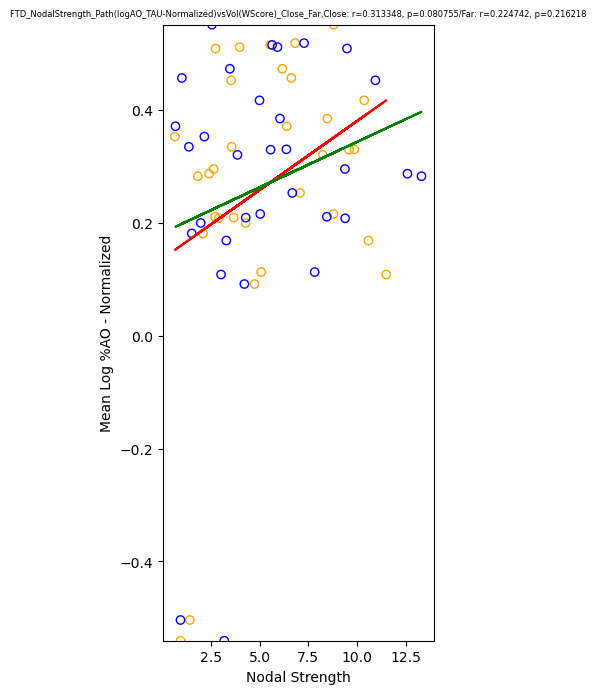

In [21]:
ns.nonZeroDegCorrCloseFar(path_TAU_Drop_Norm, cov_volAtPath_w_dict_Drop["TAU"], 
                       strong_connection_at_path_list_TAU,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far', 
                       linear_regression = True)

## TDP

In [22]:
strong_connection_at_path_list_TDP = []

for i in range(len(pathToAtlasIndex_list_TDP)):
    # For each Pathology Node
    connection_list = []
    for j in pathToAtlasIndex_list_TDP[i]: # Get indices of equivalent Thickness region (out of 400)
        # Get indices of thickness regions that is connected (Not NaN)
        connections = np.argwhere(~np.isnan(cov_vol_w_dict['HC'][j])).flatten() 
        # Save each connections into a list
        connection_list.append(connections)

    # Get connection that is intersecting with all of the equivalent Thickness regions
    strong_connection_list = reduce(np.intersect1d, connection_list)

    # Get the indicies of the pathology regions (that is strongly connected)
    strong_connection_at_path = []
    for index in range(len(pathToAtlasIndex_list_TDP)):
        for el in strong_connection_list:
            if el in pathToAtlasIndex_list_TDP[index]:
                strong_connection_at_path.append(index)

    # Get only the unique strongly connected pathology regions             
    strong_connection_at_path = np.unique(np.array(strong_connection_at_path))

    strong_connection_at_path_list_TDP.append(strong_connection_at_path)

In [23]:
strong_connection_at_path_list_TDP[0]

array([ 1,  3,  4,  6, 11, 13, 15, 16, 19, 21, 22, 30])

<Figure size 640x480 with 0 Axes>

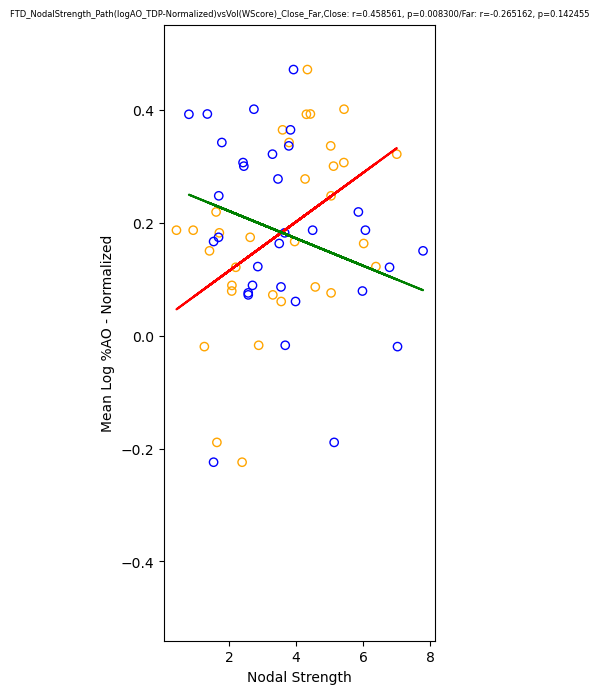

In [24]:
ns.nonZeroDegCorrCloseFar(path_TDP_Drop_Norm, cov_volAtPath_w_dict_Drop["TDP"], 
                       strong_connection_at_path_list_TDP,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far', 
                       linear_regression = True)

## Orange/Red - Close
## Blue/Green - Far